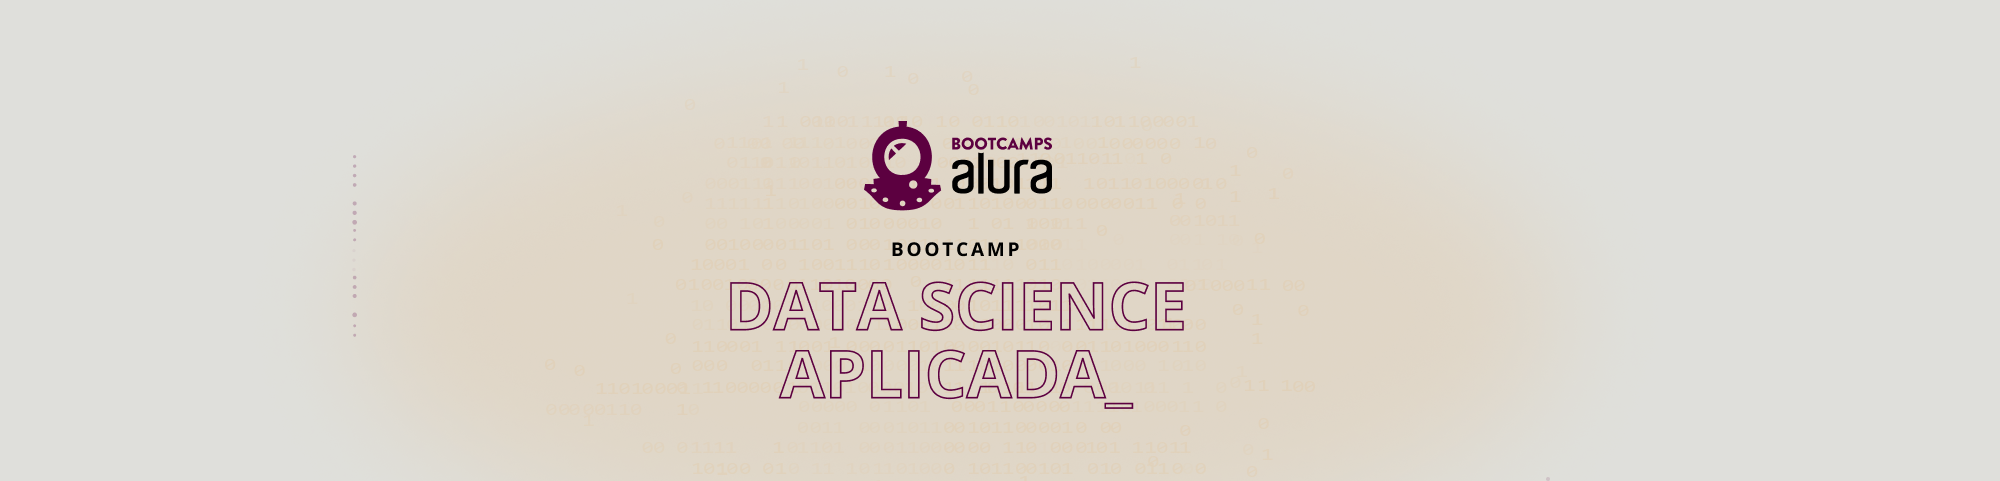

**[DATASUS](http://www2.datasus.gov.br/DATASUS/index.php?area=02) data exploration notebook**

In this module we explore data extracted from the Brazilian government's health data set, which shows the hospital environment spending, in SUS, as of 2008.

# **Presettings**

Importing libraries and some configuration

In [1]:
# imports do 1° módulo
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# imports do capítulo 02 do 2° módulo
import numpy as np
import seaborn as sns

# imports do capítulo 04 do 2° módulo
import datetime
from datetime import date #import do item date em datetime

In [2]:
#setting charts style
sns.set()

#transforming scientific numbers on data sheat into extended numbers
pd.options.display.float_format = "{:.2f}".format

Importing data sheat

In [3]:
link_dados = 'https://github.com/SaraZachi/BootCamp_Alura_2021/blob/main/Aula%201/Data/A160324189_28_143_208.csv?raw=true'
dados = pd.read_csv(link_dados,encoding = 'ISO-8859-1',
                    skiprows = 3, sep=';',skipfooter=12,
                    thousands = ".", decimal =',')
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


# **Modulo 01**

In [4]:
# Selecting / separating only columns with non-null values

## For this, it was necessary to: 
## 1) identify the columns with non-null values;
## 2) define the index of non-null columns to perform the slice later;
## 3) insert/add the 'Unidade da Federação' column in the position zero of the index.

## For the 3rd step it was necessary to add '.tolist ()' to the first line of the code 
## in order to transform 'colunas_usaveis' into a python list, which is mutable, as opposed
## to .index, which is immutable.

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [5]:
# Slice of months/year with non-zero values
usaveis = dados[colunas_usaveis]
usaveis

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [6]:
# Returning 'Unidade da Federação' as the index for our new slice
usaveis = usaveis.set_index('Unidade da Federação')
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [7]:
# Transposing (T) the Data Frame (DF)
usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,17319947.66,15386630.89,53843729.23,14241361.44,8395906.57,59109689.20,126330649.86,23735724.64,68160773.35,251696362.66,96727112.19,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,19916570.52,18970543.57,65424719.40,15254204.31,8450209.57,61756775.71,136867275.75,28614683.75,86281033.16,302857660.98,106103737.62,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,20219961.81,19666096.87,68145110.59,14278872.07,6705923.03,65159300.63,135977571.87,27450865.16,77604925.21,299060851.62,92901461.36,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,19593057.45,15491469.06,62325444.34,13087850.40,3312766.32,58898100.40,120467187.34,27460475.47,71540227.33,282709570.31,80320852.69,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26
Total,929129659.72,420668039.63,1771654871.23,305010883.18,4437115730.71,291637984.75,999998621.85,3632860959.84,2130616492.35,6197357245.98,2477372149.60,2470550104.25,8046954289.39,2104405303.11,1130337049.71,9193802684.16,19160106499.88,3139189177.73,9696362872.68,38929353900.57,13786964617.27,7324100054.96,11958647088.33,2172157981.36,2036923784.59,4657348958.66,2429933198.76


In [8]:
# Remooving/droping (drop) the line 'Total' from the DF
usaveis = usaveis.drop('Total', axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,26992

In [9]:
# Locating 5 first lines within the column '2019/Ago'
usaveis['2019/Ago'].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [10]:
# Adicionando uma coluna já existente
usaveis['Total'] = usaveis.sum(axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [11]:
usaveis.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [12]:
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis='columns')
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.

In [13]:
sem_outlier = ordenado_por_total.columns[6:] #excluding columns we dont want
ordenado_por_total = ordenado_por_total[sem_outlier] #adding our new selection to the variable 'ordenado_por_total' and atributing its new value
ordenado_por_total

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,5

In [14]:
mes_mais_recente = ordenado_por_total.columns[-2]
mes_mais_recente

'2020/Jun'

In [15]:
gastos_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_mais_recente.head()

Unidade da Federação
35 São Paulo           299060851.62
31 Minas Gerais        135977571.87
41 Paraná               92901461.36
43 Rio Grande do Sul    89019478.82
33 Rio de Janeiro       77604925.21
Name: 2020/Jun, dtype: float64

In [16]:
gastos_mais_recente

Unidade da Federação
35 São Paulo             299060851.62
31 Minas Gerais          135977571.87
41 Paraná                 92901461.36
43 Rio Grande do Sul      89019478.82
33 Rio de Janeiro         77604925.21
29 Bahia                  65159300.63
26 Pernambuco             68145110.59
42 Santa Catarina         56503747.99
23 Ceará                  42146555.81
52 Goiás                  34437633.20
15 Pará                   35396030.78
21 Maranhão               31128144.66
32 Espírito Santo         27450865.16
24 Rio Grande do Norte    20219961.81
25 Paraíba                19666096.87
53 Distrito Federal       23479773.03
50 Mato Grosso do Sul     15838659.34
22 Piauí                  15375523.59
27 Alagoas                14278872.07
51 Mato Grosso            14585009.42
13 Amazonas               17509334.66
28 Sergipe                 6705923.03
17 Tocantins               5018138.13
11 Rondônia                9193593.76
12 Acre                    2199920.70
14 Roraima                 32

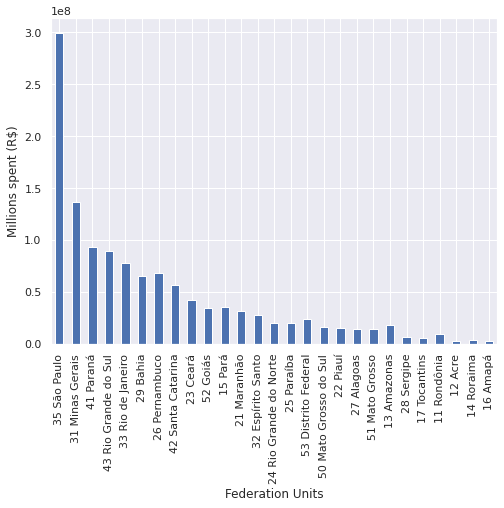

In [17]:
gastos_mais_recente.plot(figsize=(8,6), kind='bar', ylabel='Millions spent (R$)', xlabel='Federation Units')

plt.show()

# **Module 02**

## **01. External sources, cleaning and handling**

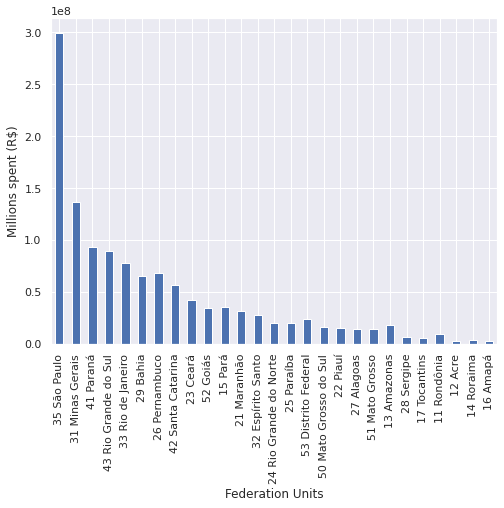

In [18]:
gastos_mais_recente.plot(figsize=(8,6), kind='bar', ylabel='Millions spent (R$)', xlabel='Federation Units')

plt.show()

No gráfico acima, é injusto comparar os gastos entre os estados, pois pode haver uma população maior em uns estados em comparação aos outros. Por consequência, uma população maior leva à um gasto maior. Deste modo, é importante relativizar os resultados, como faremos abaixo.

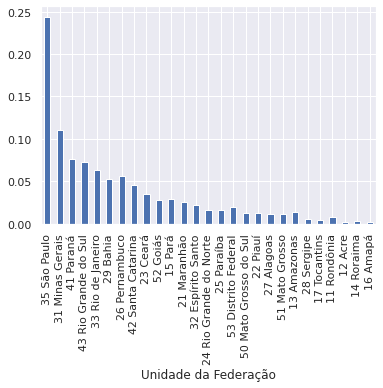

In [19]:
# Para relativizar os resultados, calculamos a porcentagem gasta por estado
gastos_proporcionais = gastos_mais_recente / gastos_mais_recente.sum()
gastos_proporcionais.plot(kind='bar')

É importante levar em consideração outros aspectos além da comparação que está sendo feita com os dados. Por exemplo, neste caso, podemos levar em consideração que uma UF com população idosa maior provavelmente terá um custo percapto maior que uma UF com maior população jovem. Deste modo, iremos importar a populção estimada pelo IBG para compararmos informações.

In [20]:
link_ibge = 'https://github.com/SaraZachi/BootCamp_Alura_2021/blob/main/M%C3%B3dulo%202/Data/estimativa_dou_2020.xls?raw=true'
ibge_est = pd.read_excel(link_ibge)
ibge_est.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


In [21]:
# Importando tabelas prontas de outras fontes (sem arquivo csv/xls) em forma de csv
# Vale resaltar que uma string em Python não reconhece multiplas linhas, por isso
# é necessário adicionar 3 aspas antes e depois do texto copiado:
dados_pop = '''Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)'''

# Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [22]:
# Lendo o csv criado

# Criando uma espécie de leitor para a string 'dados_pop'
from io import StringIO
dados_pop_io = StringIO(dados_pop)

## Só "pd.read_csv(dados_pop, sep='\t')" não funciona pois, no lugar de 'dados_pop' 
## devemos importar um caminho para essa string. '\t' => tab
populacao = pd.read_csv(dados_pop_io, sep='\t') 
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


In [23]:
populacao['populacao'] = populacao['População']
populacao['uf'] = populacao['Unidade federativa']

display(populacao.head())
display(populacao.info())

,Posição,Unidade federativa,População,% da pop. total,País comparável,populacao,uf
0,(habitantes),NaN,NaN,NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864),46 289 333,São Paulo
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000),21 292 666,Minas Gerais
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900),17 366 189,Rio de Janeiro
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000),14 930 634,Bahia Bahia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posição             28 non-null     object
 1   Unidade federativa  27 non-null     object
 2   População           27 non-null     object
 3   % da pop. total     27 non-null     object
 4   País comparável     27 non-null     object
 5   populacao           27 non-null     object
 6   uf                  27 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


None

Repare que 'populacao' é um objeto e precisa ser transformado em numérico. As duas primeiras linhas do código também não funcionaram para substituir o título das colunas Unidade Federativa e População.

In [24]:
from io import StringIO

dados_pop_io = StringIO(dados_pop)

populacao = pd.read_csv(dados_pop_io, sep="\t")
populacao = populacao.dropna() #excluindo as linas com 'NaN'
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
# Retirando os espaçoes tentre os números de 'populacao' e transformando o objeto em números
populacao["uf"] = populacao["Unidade federativa"] # Subs. Unidade federativa por uf
populacao =  populacao[["populacao", "uf"]].set_index('uf') # Deixando apenas as colunas desejadas e dando um index ao df
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [25]:
# Mantendo apenas 3 caracteres de cada objeto em 'uf'
# populacao['uf'].str[:3] => funciona para colunas, não precisam ser index
populacao.index.str[:3]

Index([' Sã', ' Mi', ' Ri', 'Bah', ' Pa', ' Ri', ' Pe', ' Ce', 'Par', ' Sa',
       ' Ma', ' Go', ' Am', ' Es', ' Pa', ' Ri', ' Ma', ' Al', ' Pi', ' Di',
       ' Ma', ' Se', ' Ro', ' To', ' Ac', ' Am', ' Ro'],
      dtype='object', name='uf')

Com os df limpos e organizados, podemos cruzar as informações dos datasets 'gastos_mais_recente' e 'populacao'.

In [26]:
gastos_mais_recente.index = gastos_mais_recente.index.str[3:] # Removendo os 3 primeiros caracteres do index
gastos_mais_recente.head() #série com index

Unidade da Federação
São Paulo           299060851.62
Minas Gerais        135977571.87
Paraná               92901461.36
Rio Grande do Sul    89019478.82
Rio de Janeiro       77604925.21
Name: 2020/Jun, dtype: float64

In [27]:
populacao.index = populacao.index.str.strip() # Arrancando fora os espaços antes das uf no index do df
populacao.head() #df com index

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


OBS.: se os indices de dois df não se combinam, não é possível realizar o comando 'join'. É importante sempre ficar atento a caracteres a mais ou espaços não identificados. Para identificar um caracter invisível, como um espaço, podemos usar, por ex.:
* populcao.index[0], sendo 0 a posição do item no index que queremos analisar;
* populacao.loc['São Paulo']

Percebemos também que algumas uf estão com o nome do estado repitido, por ex.: 'Bahia Bahia'. Vamos arrumar isso:

In [28]:
for estado in gastos_mais_recente.index: # Para 'estado' no index de 'gastos_mais_recente'
  populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)
  # substitua na string (str) 'index', {estado} {estado} por estado
populacao.index 

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [29]:
# Juntando os dados de 'populacao' com 'gastos_mais_recente'
populacao.join(gastos_mais_recente)

,populacao,2020/Jun
uf,,
São Paulo,46289333,299060851.62
Minas Gerais,21292666,135977571.87
Rio de Janeiro,17366189,77604925.21
Bahia,14930634,65159300.63
Paraná,11516840,92901461.36
Rio Grande do Sul,11422973,89019478.82
Pernambuco,9616621,68145110.59
Ceará,9187103,42146555.81
Pará,8690745,35396030.78


### **01. Desafios**

**Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.**

In [30]:
from bs4 import BeautifulSoup #Beautiful Soup é uma biblioteca para extrair dados de arquivos HTML e XML
import requests #Requests é uma biblioteca HTTP 

url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

conteudo_html = requests.get(url).text
soup = BeautifulSoup(conteudo_html, "lxml")
tabela = soup.find_all('table')
data = pd.read_html(str(tabela))
pop = pd.DataFrame(data[0])
pop

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


**Desafio 02 - Neste desafio temos uma série de passos:**

* **Padronizar os nomes das colunas**
* **Transformar os dados nos tipos corretos**
* **Transformar a UF em index**

Ref: https://www.youtube.com/watch?v=6NgyWKaP1ZU

In [31]:
# Fazendo uma cópia do df
pop_new = pop.copy()

# Tirando colunas indesejadas
pop_new.drop(columns=['Posição', '% da pop. total', 'País comparável (habitantes)'], inplace=True)

# Renomeando as colunas Unidade federativa e População
pop_new.rename(columns={'Unidade federativa':'uf', 'População':'populacao'}, inplace=True)


# Transformando a coluna uf em index
pop_new.set_index('uf', inplace=True)

pop_new

,populacao
uf,
São Paulo,46 289 333
Minas Gerais,21 292 666
Rio de Janeiro,17 366 189
Bahia,14 930 634
Paraná,11 516 840
Rio Grande do Sul,11 422 973
Pernambuco,9 616 621
Ceará,9 187 103
Pará,8 690 745


In [32]:
# Tirando os espaços entre os numeros em 'populacao'
pop_new['populacao'] = pop_new['populacao'].str.replace(' ', '')

#Transformando a coluna populacao em valores numéricos ('int64')
# 'dtype' pode ser tbm 'int' (número inteiro), dentre outros como 'objeto', etc.
pop_new['populacao'] = pop_new['populacao'].astype('int64')

pop_new

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


**Desafio 03 - Buscar na documentação alguns métodos envolvendo strings**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sub.html

**Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".**

Referências:
1. https://www.youtube.com/watch?v=mb5OeMveUzg
2. https://github.com/Pedro-correa-almeida/Bootcamp_alura/blob/main/Modulo_2/aulas/Aula1.ipynb
3. https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1

No link 3 se encontra a lista da população das unidades federativas brasileiras segundo estimativas de 1º de julho de 2020 do Instituto Brasileiro de Geografia e Estatística (IBGE) utilizado na função 'juntando_dfs'. Dito isso, iremos juntar a tabela populacao (do IBGE) com os dados dos gastos hospitalares,gerados pelo SUS, no mês de julho de 2020.

In [33]:
''' Processando a tabela populacao = pop_ibge '''
# Importando a tabela dos dados do IBGE
ibge_html = requests.get(url).text
soup = BeautifulSoup(ibge_html, "lxml")
data_content = pd.read_html(str(soup.find_all('table')))
pop_ibge = pd.DataFrame(data_content[0])
    
# Removendo colunas indesejadas
pop_ibge.drop(columns=['Posição', '% da pop. total', 'País comparável (habitantes)'], inplace=True)
    
# Renomeando as colunas 'Unidade federativa' e 'População'
pop_ibge.rename(columns={'Unidade federativa':'uf', 'População':'populacao'}, inplace=True)
    
# Transformando 'uf' em index
pop_ibge.set_index('uf', inplace=True)
    
# Removendo espaços em branco de 'população' e transformando em str
pop_ibge['populacao'] = pop_ibge['populacao'].str.replace(' ', '').astype('int64')  

# Removendo espaços antes do nome das ufs no index do df
pop_ibge.index = pop_ibge.index.str.strip() 

pop_ibge.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [34]:
def df_populacao (url):

    ''' Processando a tabela populacao = pop_ibge '''
    # Importando a tabela dos dados do IBGE
    ibge_html = requests.get(url).text
    soup = BeautifulSoup(ibge_html, "lxml")
    data_content = pd.read_html(str(soup.find_all('table')))
    pop_ibge = pd.DataFrame(data_content[0])
        
    # Removendo colunas indesejadas
    pop_ibge.drop(columns=['Posição', '% da pop. total', 'País comparável (habitantes)'], inplace=True)
        
    # Renomeando as colunas 'Unidade federativa' e 'População'
    pop_ibge.rename(columns={'Unidade federativa':'uf', 'População':'populacao'}, inplace=True)
        
    # Transformando 'uf' em index
    pop_ibge.set_index('uf', inplace=True)
        
    # Removendo espaços em branco de 'população' e transformando em str
    pop_ibge['populacao'] = pop_ibge['populacao'].str.replace(' ', '').astype('int64')  

    # Removendo espaços antes do nome das ufs no index do df
    pop_ibge.index = pop_ibge.index.str.strip() 

    return pop_ibge

In [35]:
pop_ibge.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [36]:

''' Formando o dataframe 'df' '''
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')

usaveis = dados[colunas_usaveis].set_index('Unidade da Federação')
  
ordenado_por_total = usaveis.sort_values('Total', ascending=False).drop('Total', axis='columns')
ordenado_por_total = ordenado_por_total / 1000000

df = ordenado_por_total[ordenado_por_total.columns[155:]]

df.index = df.index.str[3:]

''' Unindo o dataframe 'df' com 'pop_ibge' '''

joined = pop_ibge.join(df)

joined.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32


In [37]:
def df_unido (dados):

  ''' Formando o dataframe 'df' '''
  colunas_usaveis = dados.mean().index.tolist()
  colunas_usaveis.insert(0, 'Unidade da Federação')

  usaveis = dados[colunas_usaveis].set_index('Unidade da Federação')
    
  ordenado_por_total = usaveis.sort_values('Total', ascending=False).drop('Total', axis='columns')
  ordenado_por_total = ordenado_por_total / 1000000

  df = ordenado_por_total[ordenado_por_total.columns[155:]]

  df.index = df.index.str[3:]

  ''' Unindo o dataframe 'df' com 'pop_ibge' '''

  joined = pop_ibge.join(df)

  return df, joined

In [38]:
pop_ibge.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [39]:
df.head()

,2020/Jul
Unidade da Federação,
São Paulo,282.71
Minas Gerais,120.47
Paraná,80.32
Rio Grande do Sul,78.93
Rio de Janeiro,71.54


In [40]:
joined

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará,8690745,27.62


In [41]:
joined.rename(columns={'2020/Jul':'Milhões gastos em Jul (2020)'})

,populacao,Milhões gastos em Jul (2020)
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará,8690745,27.62


## **02. Proportionalities and seaborn**

**Visualização, Seaborn e Proporcionalidades**

In [42]:
gastos_pop_recente = populacao.join(gastos_mais_recente)
gastos_pop_recente.head()

,populacao,2020/Jun
uf,,
São Paulo,46289333,299060851.62
Minas Gerais,21292666,135977571.87
Rio de Janeiro,17366189,77604925.21
Bahia,14930634,65159300.63
Paraná,11516840,92901461.36


In [43]:
# Fução que cria um novo df com apenas com a coluna gastos do mês de escolha
def insere_gastos_e_gasto_por_hab(todos_os_gastos, dados, mes: str):
    gastos_do_mes = todos_os_gastos[mes]
    dados[f'gastos_{mes}'] = gastos_do_mes * 1000000
    dados[f'gasto_por_hab_{mes}'] = dados[f'gastos_{mes}'] / dados['populacao']

Horripilante (gráfico inaceitável):

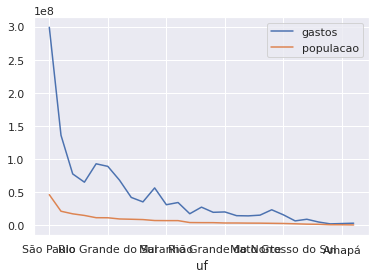

In [44]:
# Sem uso da função
gastos_pop_recente['gastos'] = gastos_pop_recente['2020/Jun']
gastos_pop_recente[['gastos', 'populacao']].plot()

* sempre se pergunte 'porque?'. Ex.: Porque estou plotando esse gráfico? Qual o sentido disso?

O gráfico acima dá a impressão de que São Paulo tem um gasto por habitante ABSURDAMENTE maior que o Rio Grande do Sul. Mas será que é isso mesmo que acontece?

Vamos averiguar:

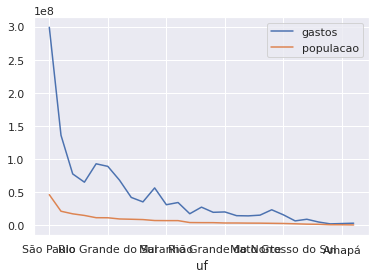

In [45]:
# Com uso da função
ordenado_por_total.index = ordenado_por_total.index.str[3:]
insere_gastos_e_gasto_por_hab(ordenado_por_total, gastos_pop_recente, '2020/Jun')
gastos_pop_recente[['gastos', 'populacao']].plot()

In [46]:
ordenado_por_total['2020/Jun']

Unidade da Federação
São Paulo             299.06
Minas Gerais          135.98
Paraná                 92.90
Rio Grande do Sul      89.02
Rio de Janeiro         77.60
Bahia                  65.16
Pernambuco             68.15
Santa Catarina         56.50
Ceará                  42.15
Goiás                  34.44
Pará                   35.40
Maranhão               31.13
Espírito Santo         27.45
Rio Grande do Norte    20.22
Paraíba                19.67
Distrito Federal       23.48
Mato Grosso do Sul     15.84
Piauí                  15.38
Alagoas                14.28
Mato Grosso            14.59
Amazonas               17.51
Sergipe                 6.71
Tocantins               5.02
Rondônia                9.19
Acre                    2.20
Roraima                 3.22
Amapá                   2.70
Name: 2020/Jun, dtype: float64

In [47]:
gastos_pop_recente.head()

,populacao,2020/Jun,gastos,gastos_2020/Jun,gasto_por_hab_2020/Jun
uf,,,,,
São Paulo,46289333,299060851.62,299060851.62,299060851.62,6.46
Minas Gerais,21292666,135977571.87,135977571.87,135977571.87,6.39
Rio de Janeiro,17366189,77604925.21,77604925.21,77604925.21,4.47
Bahia,14930634,65159300.63,65159300.63,65159300.63,4.36
Paraná,11516840,92901461.36,92901461.36,92901461.36,8.07


In [48]:
gastos_pop_recente.loc[['Rio Grande do Sul', 'São Paulo']]

,populacao,2020/Jun,gastos,gastos_2020/Jun,gasto_por_hab_2020/Jun
uf,,,,,
Rio Grande do Sul,11422973,89019478.82,89019478.82,89019478.82,7.79
São Paulo,46289333,299060851.62,299060851.62,299060851.62,6.46


In [49]:
gasto_rs = 89019478.82/11422973
gasto_rs

7.7930219059434

In [50]:
gasto_sp = 299060851.62/46289333
gasto_sp

6.460686128702697

Vimos acima que, ao dividir os gastos pelo número de habitantes em SP e RS, o resultado foi muito próximo. Deste modo, iremos criar uma nova coluna dos gastos por habitante em nosso df e averiguar se o mesmo se aplica para as demais UFs.

In [51]:
gastos_pop_recente.head()

,populacao,2020/Jun,gastos,gastos_2020/Jun,gasto_por_hab_2020/Jun
uf,,,,,
São Paulo,46289333,299060851.62,299060851.62,299060851.62,6.46
Minas Gerais,21292666,135977571.87,135977571.87,135977571.87,6.39
Rio de Janeiro,17366189,77604925.21,77604925.21,77604925.21,4.47
Bahia,14930634,65159300.63,65159300.63,65159300.63,4.36
Paraná,11516840,92901461.36,92901461.36,92901461.36,8.07


O gráfico abaixo nos mostra os gastos por habitante de cada Uf. As barras de gasto por habiante estão ordenadas iniciando, da esquerda para direita, pelo estado com maior gasto total até o estado com menor gasto total. Isso nos mostra que, apesar de São Paulo ser a UF com maior gasto hospitalar no Brasil, ele ainda gasta, por habitante, o equivalente aos gastos de Minas Gerais.

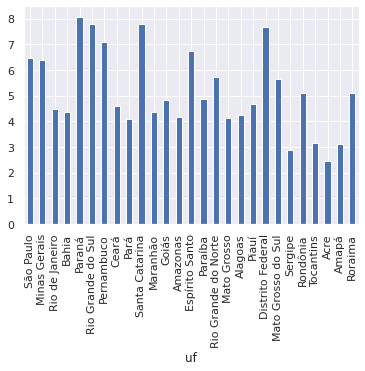

In [52]:
gastos_pop_recente['gasto_por_hab_2020/Jun'].plot(kind='bar')

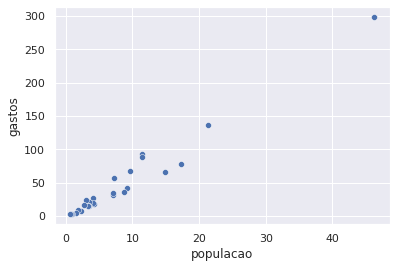

In [53]:
sns.scatterplot(data=gastos_pop_recente / 1000000, x='populacao', y='gastos')

O gráfico abaixo nos mostra que a população está diretamente correlacionada ao gasto, ou seja, quanto maior a população maior o gasto.

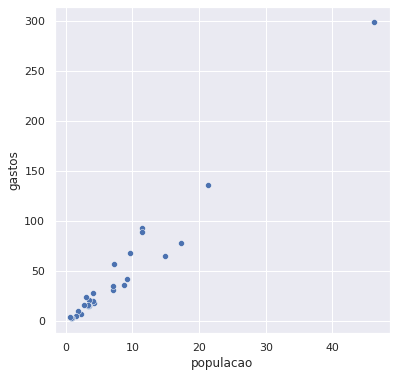

In [54]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=gastos_pop_recente / 1000000, x='populacao', y='gastos')

Ao relacionarmos população com gasto por habitante, podemos perceber que a relação que tivemos anteriormente desaparece. Ou seja, não há uma relação nítida/explícita entre o número de habitantes (população) e o gasto por habitante.

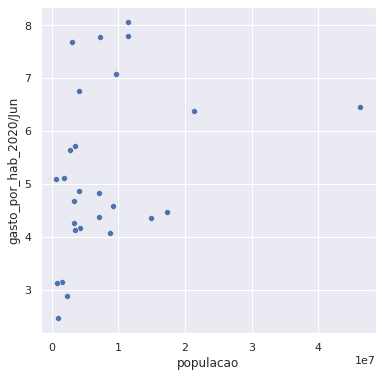

In [55]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=gastos_pop_recente, x='populacao', y='gasto_por_hab_2020/Jun')

**Resolvendo o Super Desafio da Aula**

In [56]:
gastos_pop_recente

,populacao,2020/Jun,gastos,gastos_2020/Jun,gasto_por_hab_2020/Jun
uf,,,,,
São Paulo,46289333,299060851.62,299060851.62,299060851.62,6.46
Minas Gerais,21292666,135977571.87,135977571.87,135977571.87,6.39
Rio de Janeiro,17366189,77604925.21,77604925.21,77604925.21,4.47
Bahia,14930634,65159300.63,65159300.63,65159300.63,4.36
Paraná,11516840,92901461.36,92901461.36,92901461.36,8.07
Rio Grande do Sul,11422973,89019478.82,89019478.82,89019478.82,7.79
Pernambuco,9616621,68145110.59,68145110.59,68145110.59,7.09
Ceará,9187103,42146555.81,42146555.81,42146555.81,4.59
Pará,8690745,35396030.78,35396030.78,35396030.78,4.07


In [57]:
insere_gastos_e_gasto_por_hab(ordenado_por_total, gastos_pop_recente, '2020/Jul')
insere_gastos_e_gasto_por_hab(ordenado_por_total, gastos_pop_recente, '2020/Mai')
gastos_pop_recente.head()

,populacao,2020/Jun,gastos,gastos_2020/Jun,gasto_por_hab_2020/Jun,gastos_2020/Jul,gasto_por_hab_2020/Jul,gastos_2020/Mai,gasto_por_hab_2020/Mai
uf,,,,,,,,,
São Paulo,46289333,299060851.62,299060851.62,299060851.62,6.46,282709570.31,6.11,302857660.98,6.54
Minas Gerais,21292666,135977571.87,135977571.87,135977571.87,6.39,120467187.34,5.66,136867275.75,6.43
Rio de Janeiro,17366189,77604925.21,77604925.21,77604925.21,4.47,71540227.33,4.12,86281033.16,4.97
Bahia,14930634,65159300.63,65159300.63,65159300.63,4.36,58898100.40,3.94,61756775.71,4.14
Paraná,11516840,92901461.36,92901461.36,92901461.36,8.07,80320852.69,6.97,106103737.62,9.21


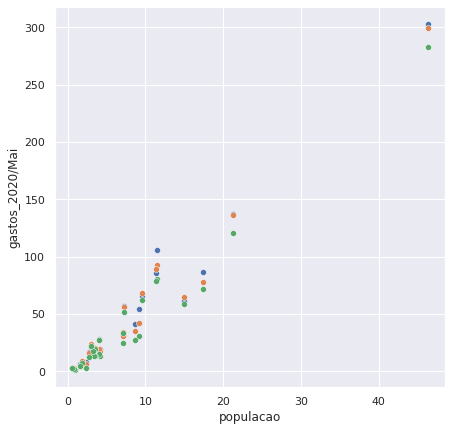

In [58]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_pop_recente / 1000000, x='populacao', y='gastos_2020/Mai')
sns.scatterplot(data=gastos_pop_recente / 1000000, x='populacao', y='gastos_2020/Jun')
sns.scatterplot(data=gastos_pop_recente / 1000000, x='populacao', y='gastos_2020/Jul')

Repara que o mês de Julho está 

### **02. Desafios**

**Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.**

Ordenando o gráfico dos 'gastos_por_hab' em ordem decrescente, do estado com maior gasto por habitante ao estado com menor gasto por habitante, podemos perceber que o Paraná tem um gasto pecapta maior que São Paulo. Apesar disso, a população do Paraná é aproximadamente 4x menor e o gasto total 3x menor que os de SP.

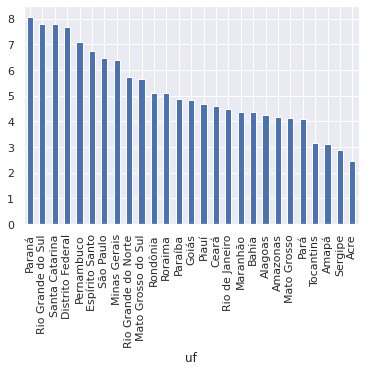

In [59]:
gastos_pop_recente['gasto_por_hab_2020/Jun'].sort_values(ascending=False).plot(kind='bar')

In [60]:
46289333	/ 11516840	

4.0192737764873

In [61]:
299.06 / 92.90

3.219160387513455

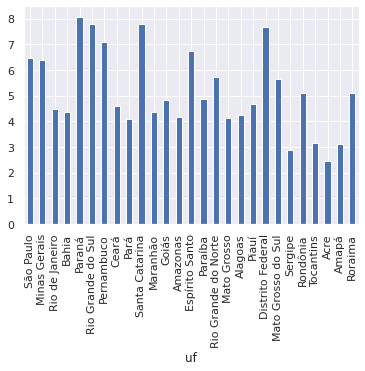

In [62]:
gastos_ordem_pop = gastos_pop_recente.sort_values(by='populacao', ascending=False)
gastos_ordem_pop = gastos_ordem_pop['gasto_por_hab_2020/Jun']
gastos_ordem_pop.plot(kind='bar')

Repare abaixo que, a primeira vista, ambos os gráficos são semelhantes, tanto o gráfico com os resultados ordenados pelo gasto total quanto o dos dados ordenados pela população.

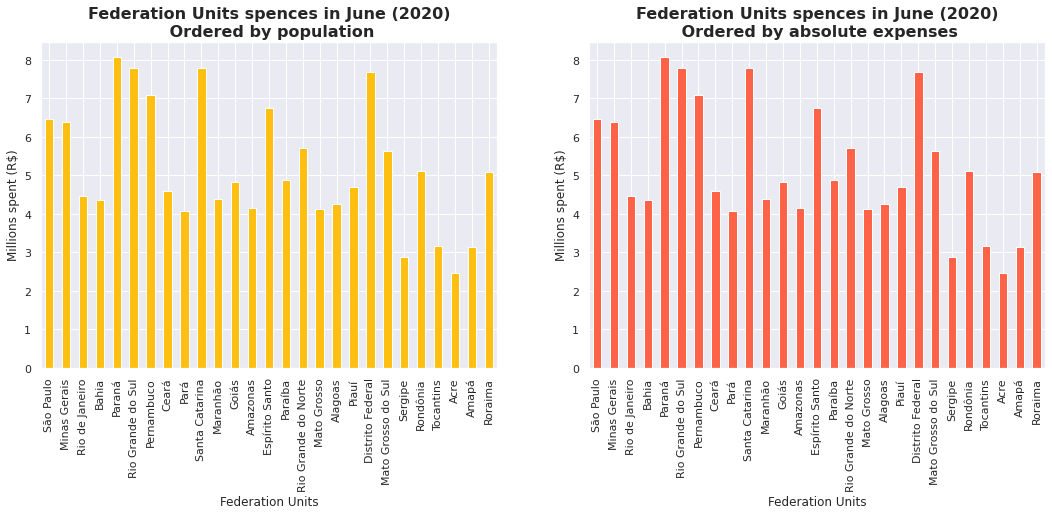

In [63]:
fig, axes = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (18, 6))
plt.subplots_adjust(wspace = 0.2)

gastos_ordem_pop.plot(ax = axes[0], kind='bar', 
            ylabel='Millions spent (R$)', 
            xlabel='Federation Units', 
            color='#fdbf11')

axes[0].set_title("Federation Units spences in June (2020)\n Ordered by population", fontsize=16, 
          fontweight='bold')

gastos_pop_recente['gasto_por_hab_2020/Jun'].plot(ax = axes[1], kind='bar',
            ylabel='Millions spent (R$)', 
            xlabel='Federation Units',
            color='tomato')

axes[1].set_title("Federation Units spences in June (2020)\n Ordered by absolute expenses", fontsize=16, 
          fontweight='bold')

plt.show()

**Desafio 02: Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.**

**Desafio 03: Plotar no mesmos gráficos do final da aula o mês anterior e o mês corrente, analisar e compartilhar suas hipóteses.**

Ref.: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

Para facilitar, resolverei os desafios 2 e 3 juntos:

In [64]:
'''
Criando um dataframe com os gastos dos últimos 3
meses e a população de cada UF
'''
#Criando o dataframe 'df2'
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')

usaveis = dados[colunas_usaveis].set_index('Unidade da Federação')
 
ordenado_por_total = usaveis.sort_values('Total', ascending=False).drop('Total', axis='columns')
ordenado_por_total = ordenado_por_total / 1000000

df2 = ordenado_por_total[ordenado_por_total.columns[153:]]

''' Formatando o dataframe 'df2' '''

# Substituindo Unidade de federação por uf
df2.rename(columns={'Unidade da Federação':'uf'})

# Removendo os 3 primeiros caracteres do index de 'df2'
df2.index = df2.index.str[3:]

data_plot = pop_ibge.join(df2)
data_plot.head()

,populacao,2020/Mai,2020/Jun,2020/Jul
uf,,,,
São Paulo,46289333,302.86,299.06,282.71
Minas Gerais,21292666,136.87,135.98,120.47
Rio de Janeiro,17366189,86.28,77.60,71.54
Bahia,14930634,61.76,65.16,58.90
Paraná,11516840,106.10,92.90,80.32


In [65]:
'''
Determinando o gasto percapta em cada mês e adicionando a coluna dos resultados
'''
data_plot['gasto_hab_mai'] = data_plot['2020/Mai'] / data_plot['populacao']
data_plot['gasto_hab_mai'] = data_plot['gasto_hab_mai'] * 1000000

data_plot['gasto_hab_jun'] = data_plot['2020/Jun'] / data_plot['populacao']
data_plot['gasto_hab_jun'] = data_plot['gasto_hab_jun'] * 1000000

data_plot['gasto_hab_jul'] = data_plot['2020/Jul'] / data_plot['populacao']
data_plot['gasto_hab_jul'] = data_plot['gasto_hab_jul'] * 1000000

data_plot.head()

,populacao,2020/Mai,2020/Jun,2020/Jul,gasto_hab_mai,gasto_hab_jun,gasto_hab_jul
uf,,,,,,,
São Paulo,46289333,302.86,299.06,282.71,6.54,6.46,6.11
Minas Gerais,21292666,136.87,135.98,120.47,6.43,6.39,5.66
Rio de Janeiro,17366189,86.28,77.60,71.54,4.97,4.47,4.12
Bahia,14930634,61.76,65.16,58.90,4.14,4.36,3.94
Paraná,11516840,106.10,92.90,80.32,9.21,8.07,6.97


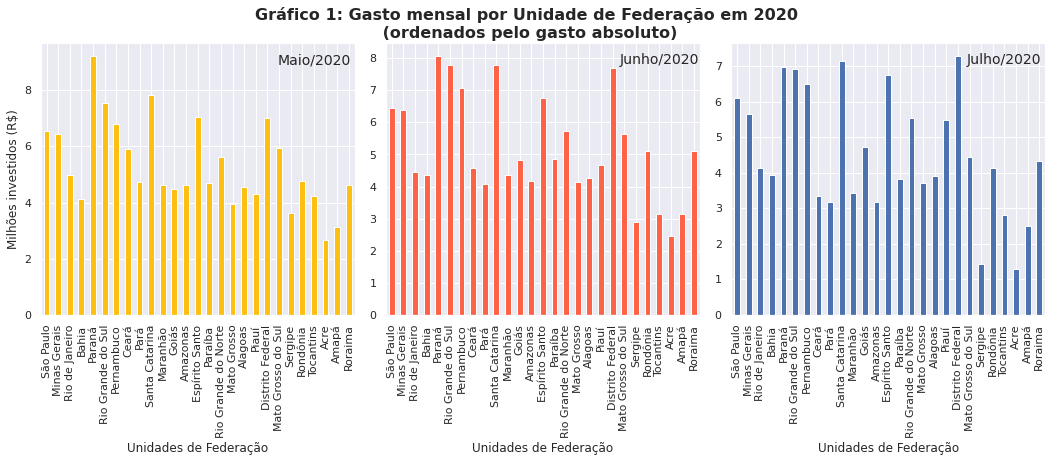

In [66]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize = (18, 5))

plt.suptitle("Gráfico 1: Gasto mensal por Unidade de Federação em 2020\n (ordenados pelo gasto absoluto)", 
             fontsize=16, fontweight='bold')

plt.subplots_adjust(wspace = 0.1)

data_plot['gasto_hab_mai'].plot(ax = axes[0], kind='bar', 
            ylabel='Milhões investidos (R$)', 
            xlabel='Unidades de Federação',
            color='#fdbf11')
axes[0].set_title("Maio/2020", fontsize=14, position=(0.87 , 0.9))

data_plot['gasto_hab_jun'].plot(ax = axes[1], kind='bar',
            xlabel='Unidades de Federação',
            color='tomato')
axes[1].set_title("Junho/2020", fontsize=14, position=(0.87 , 0.9))

data_plot['gasto_hab_jul'].plot(ax = axes[2], kind='bar', 
            xlabel='Unidades de Federação')
axes[2].set_title("Julho/2020", fontsize=14, position=(0.87 , 0.9))

plt.show()

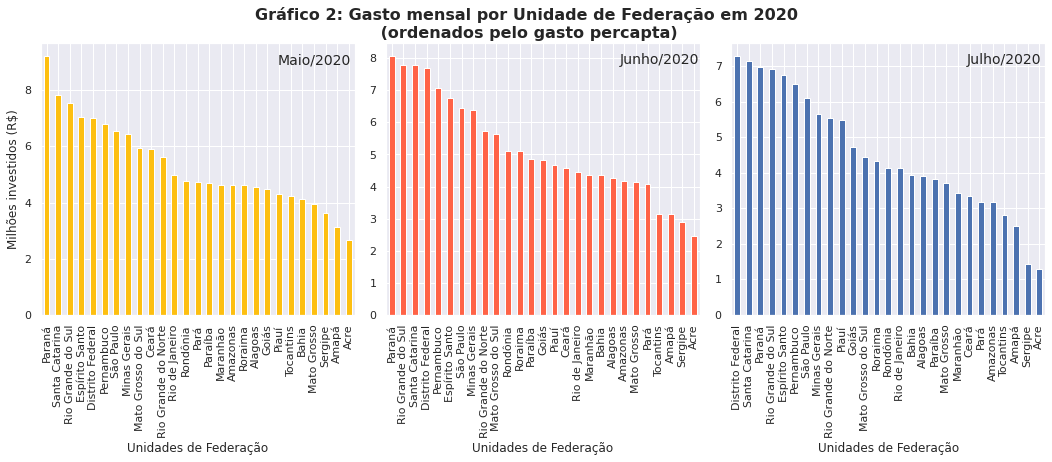

In [67]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize = (18, 5))

plt.suptitle("Gráfico 2: Gasto mensal por Unidade de Federação em 2020\n (ordenados pelo gasto percapta)", 
             fontsize=16, fontweight='bold')

plt.subplots_adjust(wspace = 0.1)

data_plot['gasto_hab_mai'].sort_values(ascending=False).plot(ax = axes[0], kind='bar', 
            ylabel='Milhões investidos (R$)', 
            xlabel='Unidades de Federação',
            color='#fdbf11')
axes[0].set_title("Maio/2020", fontsize=14, position=(0.87 , 0.9))

data_plot['gasto_hab_jun'].sort_values(ascending=False).plot(ax = axes[1], kind='bar',
            xlabel='Unidades de Federação',
            color='tomato')
axes[1].set_title("Junho/2020", fontsize=14, position=(0.87 , 0.9))

data_plot['gasto_hab_jul'].sort_values(ascending=False).plot(ax = axes[2], kind='bar', 
            xlabel='Unidades de Federação')
axes[2].set_title("Julho/2020", fontsize=14, position=(0.87 , 0.9))

plt.show()

In [68]:
'''
Ordenando os dados pelo número de habitantes
'''
data_plot_hab = data_plot.sort_values(by='populacao', ascending=False)
data_plot_hab.head()

,populacao,2020/Mai,2020/Jun,2020/Jul,gasto_hab_mai,gasto_hab_jun,gasto_hab_jul
uf,,,,,,,
São Paulo,46289333,302.86,299.06,282.71,6.54,6.46,6.11
Minas Gerais,21292666,136.87,135.98,120.47,6.43,6.39,5.66
Rio de Janeiro,17366189,86.28,77.60,71.54,4.97,4.47,4.12
Bahia,14930634,61.76,65.16,58.90,4.14,4.36,3.94
Paraná,11516840,106.10,92.90,80.32,9.21,8.07,6.97


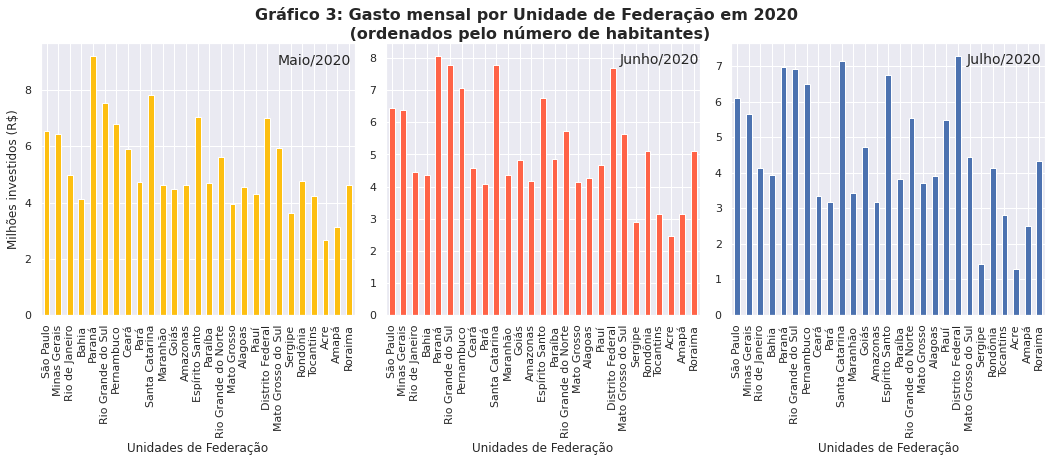

In [69]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize = (18, 5))

plt.suptitle("Gráfico 3: Gasto mensal por Unidade de Federação em 2020\n (ordenados pelo número de habitantes)", 
             fontsize=16, fontweight='bold')

plt.subplots_adjust(wspace = 0.1)

data_plot_hab['gasto_hab_mai'].plot(ax = axes[0], kind='bar', 
            ylabel='Milhões investidos (R$)', 
            xlabel='Unidades de Federação',
            color='#fdbf11')
axes[0].set_title("Maio/2020", fontsize=14, position=(0.87 , 0.9))

data_plot_hab['gasto_hab_jun'].plot(ax = axes[1], kind='bar',
            xlabel='Unidades de Federação',
            color='tomato')
axes[1].set_title("Junho/2020", fontsize=14, position=(0.87 , 0.9))

data_plot_hab['gasto_hab_jul'].plot(ax = axes[2], kind='bar', 
            xlabel='Unidades de Federação')
axes[2].set_title("Julho/2020", fontsize=14, position=(0.87 , 0.9))

plt.show()

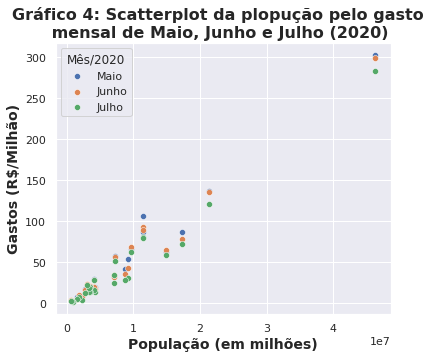

In [70]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=data_plot, x='populacao', y='2020/Mai', label = 'Maio')
sns.scatterplot(data=data_plot, x='populacao', y='2020/Jun', label = 'Junho')
sns.scatterplot(data=data_plot, x='populacao', y='2020/Jul', label = 'Julho')

plt.suptitle("Gráfico 4: Scatterplot da plopução pelo gasto\n mensal de Maio, Junho e Julho (2020)", 
             fontsize=16, fontweight='bold')
plt.xlabel('População (em milhões)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Gastos (R$/Milhão)', fontsize = 14, fontweight = 'bold')
plt.legend(title='Mês/2020')

plt.show()

**Desafio 04: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.**

* Com o primeiro desafio dessa aula, podemos supor que, quanto maior for a população, maior será o gasto total. No entanto, o gasto pot habitante varia de acordo com outros parâmetros que ainda precisam ser estudados. Por exemplo, se levarmos em consideração a população, uma população com mais idosos ou mais jovens pode gerar um custo percapta maior ou menor, respectivamente; ou ainda, o custo de vida da UF x pode ser maior que o da UF y; dentre outros fatores que podem ser considerados.

* Com os gráficos do segundo e terceiro desafio, podemos perceber alguns pontos:
  1. no gráfico 1, apesar te terem escalas distintas no eixo y, os resutados dos três meses parecem semelhantes. No entanto, ao observamos o gráfico 2, percebemos uma pequena diferença entre cada um deles.
  2. Ainda no gráfico 2, repare que a ordem das Unidades de Federação não é a mesma em cada um dos gráficos. Sabendo que este gráfico está em ordem decrescente por gasto percapta, percebemos que São Paulo não é o estado com maior gasto percapta, estanto em 7° lugar nos três meses. Pecebemos também que o Acre é o estado com menor gasto percapta nos mesmos três meses.
  3. Apesar de no gráfico 2 o Acre ser o estado com menor gasto percapta, ele não é o estado com menor população, ficando em 3° lugar desta colocação. 
  4. No gráfico 4 também podemos percever uma tendência que nos mostra que quanto maior a população, maior será o gasto da UF.

  Para compreendermos melhor o motivo de nossos resultados resultados, seria interessante relacionar o número de habitantes com a poplação de idosos, jovens e crianças de cada estado. É importante buscar outras informações para correlacionar com nossos dados e expandir a confiabilidade da análise.

## **03. Ticks, escalas e formatação de iagens**

In [71]:
ordenado_total = ordenado_por_total.copy()
ordenado_total.index = ordenado_total.index.str[3:]
ordenado_total = ordenado_total[ordenado_total.columns[6:]]

In [72]:
ordenado_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,177.09,192.32,178.60,216.95,215.05,212.89,212.67,214.04,215.21,214.14,216.06,208.97,192.13,213.47,195.78,239.32,221.17,231.78,223.93,224.07,248.01,224.05,238.94,225.48,210.61,229.09,221.60,241.40,229.82,250.79,...,263.47,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,88.93,99.02,83.68,100.24,91.83,97.29,95.72,100.05,98.97,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.83,105.49,99.67,103.36,107.84,104.34,100.53,101.94,99.54,107.74,103.14,111.07,106.09,115.49,...,136.72,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,106.03,120.54,111.73,118.59,122.12,110.66,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.07,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.45,132.58,124.86,134.62,127.17,126.17,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,83.19,95.15,93.17,94.42,94.23,86.42,91.60,85.79,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.12,95.84,103.03,98.55,94.37,96.91,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93
Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,43.01,60.87,40.66,52.75,48.90,51.17,57.23,53.49,51.22,48.48,48.67,49.69,44.41,55.99,44.82,54.46,78.12,56.01,51.44,53.86,57.87,53.74,52.37,50.22,50.89,74.01,61.11,55.32,55.81,59.07,...,64.52,74.32,69.85,73.15,74.54,68.73,73.08,69.26,67.32,72.34,65.02,74.39,74.52,79.26,75.91,77.49,78.78,72.84,79.14,73.95,70.69,79.47,73.80,74.92,76.67,82.44,78.19,87.98,83.31,81.15,82.25,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54


Usando o comando 'scatterplot' com listas em x e y

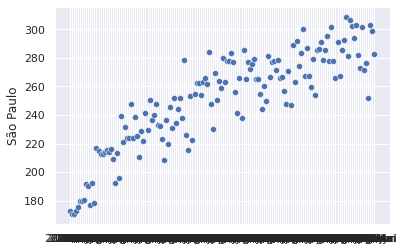

In [73]:
# como já estamos especificando o banco de dados de onde é extraído x e y, não é necesário especificar
# 'data' -> Ex.: data = ordenado_total
sns.scatterplot(x=ordenado_total.columns, y=ordenado_total.loc['São Paulo'])

In [74]:
mensal=ordenado_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


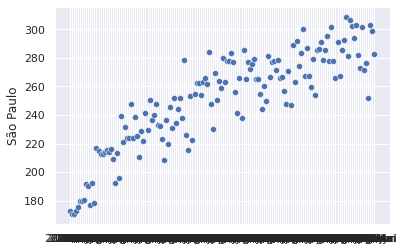

In [75]:
# Outra forma de plotar o mesmo gráfico
# sns.scatterplot(data=ordenado_total.T, x=ordenado_total.T.index, y='São Paulo')
sns.scatterplot(data=mensal, x=mensal.index, y='São Paulo')

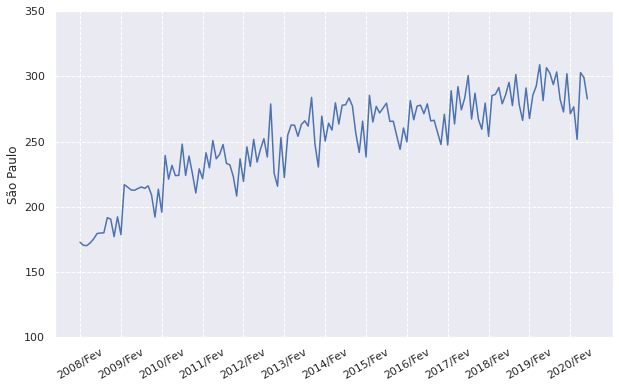

In [76]:
# 'ax' de 'axis'
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=30)

# Escala do eixo y
plt.ylim(100,350)

# utilizando 'ticker' da biblioteca 'Matplotlib' para autolocalizar a posição e legenda dos tickers.
# ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0)) # começa (offset) no 0 e mostra (base) de 12 em 12

# Adicionar grid e dando uma nova cara para as linhas (linestyle)
# Não precisa do True nesse código, ele apenas é necessário para desenhar o gid sem nenhum outro paâmetro.
# Como nesse código temos o parâmetro 'linestyle', 'True' pode ser retirado.
plt.grid(True, linestyle='--')

plt.show()

https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html

### **03. Desafios**

**Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.**

In [77]:
data = mensal.T
data = data[data.columns[11:]]
data = data.T

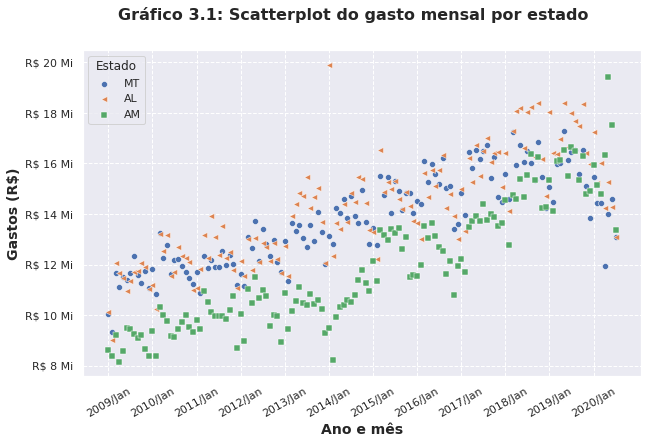

In [78]:
# Definindo o tamnho da figura
plt.figure(figsize=(10,6))

# Plotando gráfico
ax = sns.scatterplot(data=data, x=data.index, y='Mato Grosso', marker='o', label = 'MT')
ax = sns.scatterplot(data=data, x=data.index, y='Alagoas', marker='<', label = 'AL')
ax = sns.scatterplot(data=data, x=data.index, y='Amazonas', marker='s', label = 'AM')

# Rotação das legendas dos ticks
plt.xticks(rotation=30)

# Mostrando as legendas dos xticks de 12 em 12 meses
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
# Adicionando o unidade de medida Mi (milhões) nas legendas dos yticks
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f} Mi"))

# Legendas do gráfico
plt.suptitle("Gráfico 3.1: Scatterplot do gasto mensal por estado", 
             fontsize=16, fontweight='bold')
plt.xlabel('Ano e mês', fontsize = 14, fontweight = 'bold')
plt.ylabel('Gastos (R$)', fontsize = 14, fontweight = 'bold')

# Colocando grid tracejado: '--'
plt.grid(linestyle='--')

# Adicionando o título das legendas relacionadas as cores no gráfico
plt.legend(title='Estado')

plt.show()

Averiguando a [documentação do Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), adicionei alguns ítens para melhorar a vizualização do grafico, e.g. legend e labels. Também modifiquei a aparencia dos [markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers).



**Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.**

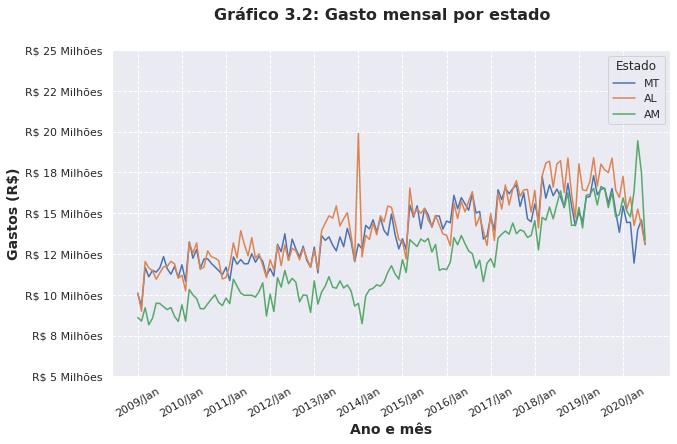

In [79]:
plt.figure(figsize=(10,6))

# Plotando gráfico
ax = sns.lineplot(data=data, x=data.index, y='Mato Grosso', label = 'MT')
ax = sns.lineplot(data=data, x=data.index, y='Alagoas', label = 'AL')
ax = sns.lineplot(data=data, x=data.index, y='Amazonas', label = 'AM')

plt.xticks(rotation=30)

plt.ylim(5,25)

# Formatação dos eixos x e y
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f} Milhões"))

# Legendas do gráfico
plt.suptitle("Gráfico 3.2: Gasto mensal por estado", 
             fontsize=16, fontweight='bold')
plt.xlabel('Ano e mês', fontsize = 14, fontweight = 'bold')
plt.ylabel('Gastos (R$)', fontsize = 14, fontweight = 'bold')

# Colocando grid tracejado: '--'
plt.grid(linestyle='--')

# Adicionando o título das legendas relacionadas as cores no gráfico
plt.legend(title='Estado')

plt.show()

**Observações gráfico 3.1:**
As correlações entre os gastos do estado e o ano/mês do registro do mesmo entre os três estados é semelhante. Apesar da correlação do Amazonas estar pouco mais abaixo das demais, não podemos concluir que seu gasto mensal é menor, pois, como vimos anteriormente, o gasto mensal por estado pode estar correlacionado à população. Além disso, há uma queda nas correlações a partir de 2020. Esse banco de dados foram sstraídos em 2021, portanto é possível que os dados de 2020 não estão completos, explicando a queda nos resultados das correlaçoes. No mais, percebe-se que, conforme o tempo passa, o gasto aumenta. Essa observação deve ser mais estudada, pois a correlação indicada pode ser devido ao aumento da inflação no decorrer dos meses, aumento da população, dentre outros fatores.

## **04. Working with Date, Time & Melt**

**Date time**

Vamos explorar neste capítulo o submódulo datetime de dentro da bibliotaca/módulo [datetime](https://docs.python.org/3/library/datetime.html).


In [80]:
# import da função: datetime.datetime(ano, mês, dia)
# que imprime: datetime.datetime(ano, mês, dia, hora)
datetime.datetime(2020, 9, 11)

datetime.datetime(2020, 9, 11, 0, 0)

In [81]:
''' Dicionário '''
meses = {
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
}

''' Fução '''
def para_dia(ano_mes: str):
  # ano_mes: str -> indica que ano_mes é uma string
  ano: int = int(ano_mes[:4]) # 'Int' e indicador de valor inteiro, que não é string
  mes: str = ano_mes[5:] #definindo mes, q ratá no index do dataframe 'ano_mes' a parti do 4° caractere
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)


# Vamos tonar o index do dataframe 'mensal' em uma série temporal
# utilizando o dia 1 como representante
mensal.index.map(para_dia)

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01,
       2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01],
      dtype='object', length=150)

In [82]:
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


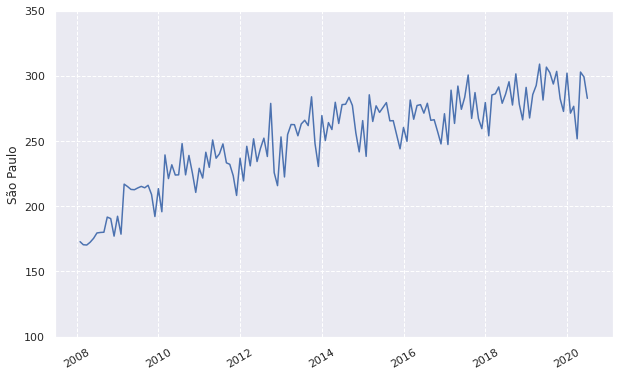

In [83]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=30)
plt.ylim(100,350)
plt.grid(True, linestyle='--')
plt.show()

**Usando melt**

Ao usar o melt, indicamos a ele apenas a coluna que queremos manter, ex.: id_vars=['index']. Tambpem podemos deixar de forma explicito quais serão as variáveis de valor, ex.: value_vars=mensal.columns

In [84]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['dia_mes_ano', 'uf', 'gasto'] # Renomeando as colunas.
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64') # Informando que a coluna 'dia_mes_ano' do df 'mensal_aberto' é do tipo datetime64
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


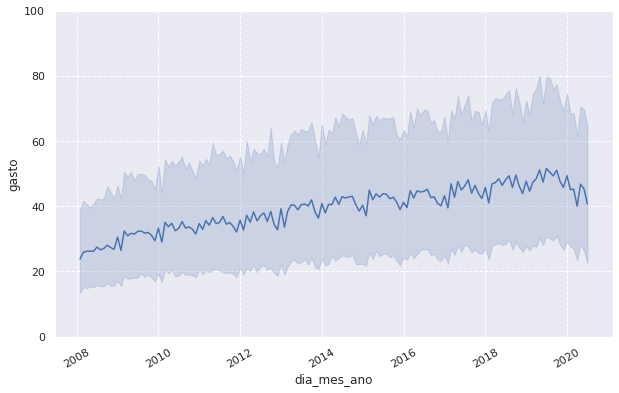

In [85]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x='dia_mes_ano', y='gasto')
plt.xticks(rotation=30)
plt.ylim(0,100)
plt.grid(True, linestyle='--')
plt.show()

Por padrão, o [gráfico de linha sns](https://seaborn.pydata.org/generated/seaborn.lineplot.html) agrega vários valores de y em cada valor de x e mostra uma estimativa da tendência central (linha azul) e um intervalo de confiança para isso (sombra azul).
O gráfico acima ficou confuso deste modo, portanto, é preciso agrupar os vários valores de y pela 'uf' utilizando 'hue':

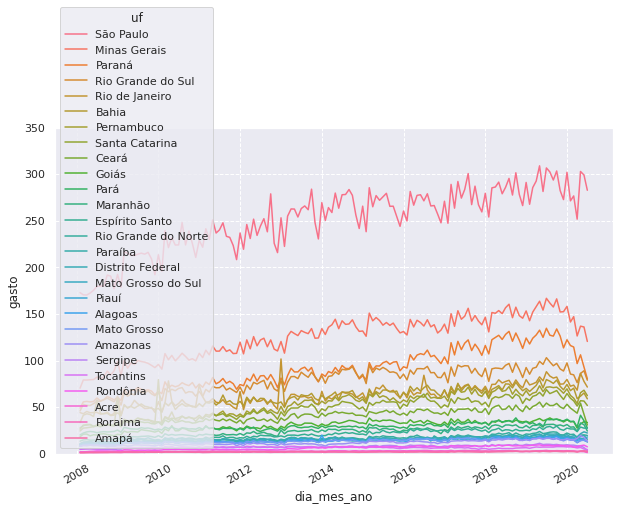

In [86]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x='dia_mes_ano', y='gasto', hue = 'uf')
plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(True, linestyle='--')
plt.show()

### **04. Desafios**

**Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.**

**Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.**

**Desafio 03: Melhorar o gráfico da distribuição do gráfico:
escolha apenas alguns estados,
mude a [palete de cores](https://seaborn.pydata.org/tutorial/color_palettes.html) (27 cores),
posicione a legenda de forma mais adequada,
adicione título principal e nos eixos x e y.**

In [87]:
centro_oeste = ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
mensal_co = mensal_aberto[mensal_aberto['uf'].isin(centro_oeste)]

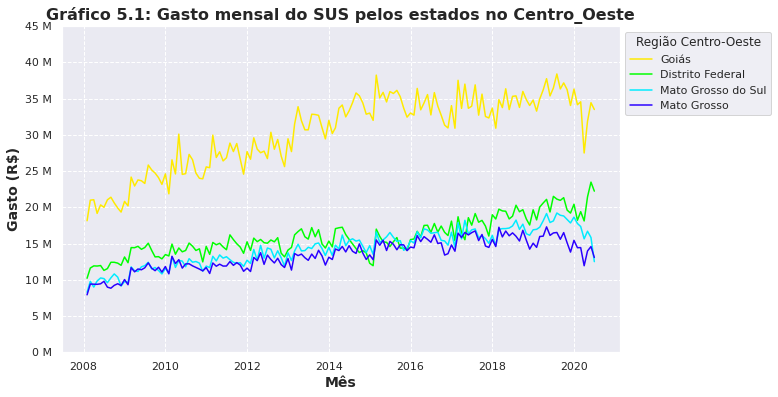

In [88]:
# Plot
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_co, x='dia_mes_ano', y='gasto', 
                  hue = 'uf', palette='gist_rainbow')

# Formating chart
plt.ylim(0,45) #y range
plt.grid(True, linestyle='--') #grid style
ax.legend(title='Região Centro-Oeste', bbox_to_anchor=(1, 1), loc=2) #legend box location
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f} M"))

# Legendas
ax.set_xlabel('Mês', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Gasto (R$)', fontsize = 14, fontweight = 'bold')
ax.set_title('Gráfico 5.1: Gasto mensal do SUS pelos estados no Centro_Oeste', fontsize=16, fontweight='bold')

plt.show()

## **05. Manipulating dates and generating new anás**

In [89]:
mensal_aberto['dia_mes_ano'][0]

Timestamp('2008-02-01 00:00:00')

In [90]:
mensal_aberto['dia_mes_ano'].head()

0   2008-02-01
1   2008-03-01
2   2008-04-01
3   2008-05-01
4   2008-06-01
Name: dia_mes_ano, dtype: datetime64[ns]

In [91]:
mensal_aberto['mes'] = mensal_aberto['dia_mes_ano'].dt.month
mensal_aberto['ano'] = mensal_aberto['dia_mes_ano'].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008


In [92]:
mensal_aberto.query("uf=='São Paulo'")

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008
...,...,...,...,...,...
145,2020-03-01,São Paulo,276.61,3,2020
146,2020-04-01,São Paulo,251.70,4,2020
147,2020-05-01,São Paulo,302.86,5,2020
148,2020-06-01,São Paulo,299.06,6,2020


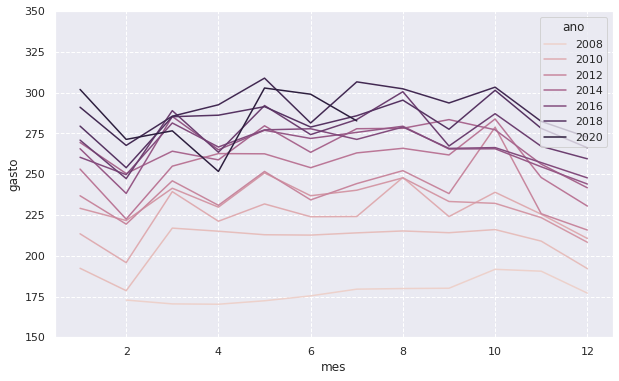

In [93]:
# Plot
plt.figure(figsize=(10,6)) #tamanho figura
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x='mes', y='gasto', hue = 'ano')

# Formating chart
plt.ylim(150,350) #y range
plt.grid(True, linestyle='--') #grid style

plt.show()

Percebemos que, no gráfico acima, o gasto em fevereiro (mes 2) é mais baixo que os demais. No entanto, devemos lembrar que, todo ano, de forma universal, o mês de fevereiro é mais curto que os demais. Deste modo, precisamos dividir o gasto de cada mês pelo número de dias do mesmo mês, para que a comparação seja mais justa.

In [94]:
# Dicionário do número de dias por mês
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [95]:
# determinando quantos milhões são gastos por dia em cada mês
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,6.17
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85


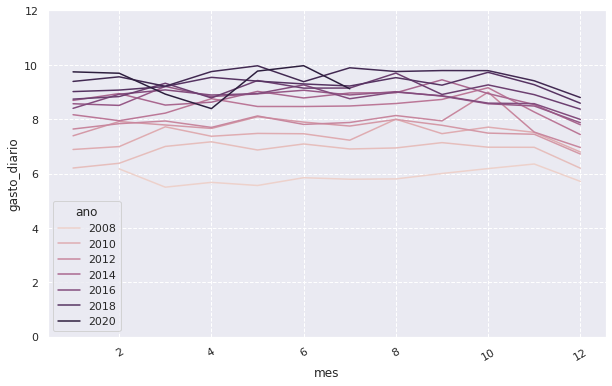

In [96]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto_diario", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 12)
plt.grid(linestyle="--")
plt.show()

### **05. Desafios**

**Desafio 01: Melhorar o gráfico ano a ano: mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.**

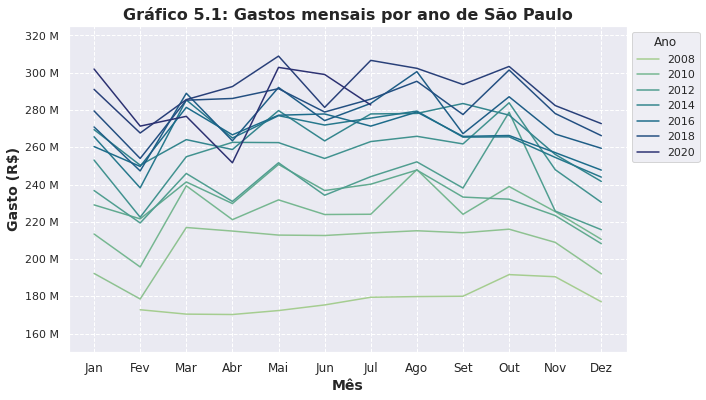

In [97]:
# Plot
plt.figure(figsize=(10,6)) #tamanho figura
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x='mes', y='gasto', 
                  hue = 'ano', palette="crest")

# Formating chart
plt.ylim(150,325) #y range
plt.grid(True, linestyle='--') #grid style
ax.legend(title='Ano', bbox_to_anchor=(1, 1), loc=2) #legend box location
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f} M"))

# Legendas
ax.set_xlabel('Mês', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Gasto (R$)', fontsize = 14, fontweight = 'bold')
ax.set_title('Gráfico 5.1: Gastos mensais por ano de São Paulo', fontsize=16, fontweight='bold')

# Changing x_ticks
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=12)

plt.show()

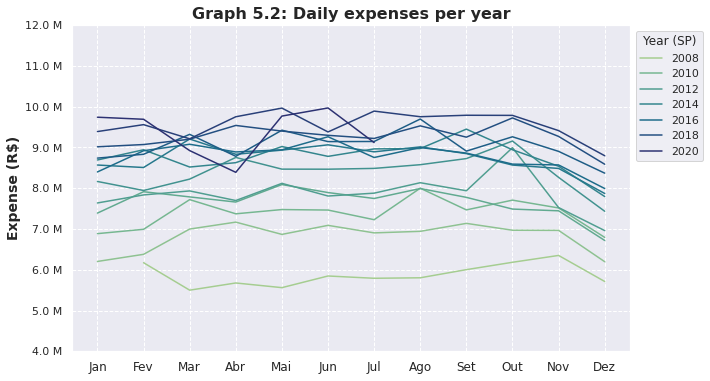

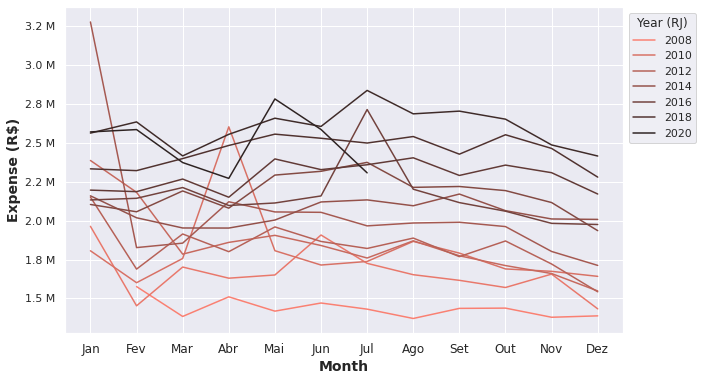

In [98]:
# Plot
plt.figure(figsize=(10,6)) #tamanho figura
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto_diario", 
                  hue = 'ano', palette="crest")

# Formating chart
plt.ylim(4,12) #y range
plt.grid(True, linestyle='--') #grid style
ax.legend(title='Year (SP)', bbox_to_anchor=(1, 1), loc=2) #legend box location
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f} M"))

# Legendas
ax.set_xlabel(None)
ax.set_ylabel('Expense (R$)', fontsize = 14, fontweight = 'bold')
ax.set_title('Graph 5.2: Daily expenses per year', fontsize=16, fontweight='bold')

# Changing x_ticks
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=12)

# __________________________________________________________________________________________________________________________

# Plot
plt.figure(figsize=(10,6)) #tamanho figura
ax = sns.lineplot(data=mensal_aberto.query("uf=='Rio de Janeiro'"), x="mes", y="gasto_diario", 
                  hue = 'ano', palette='dark:salmon_r')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f} M"))

# Legendas
ax.set_xlabel('Month', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Expense (R$)', fontsize = 14, fontweight = 'bold')
ax.set_title(None)
ax.legend(title='Year (RJ)', bbox_to_anchor=(1, 1), loc=2) #legend box location

# Changing x_ticks
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=12)

plt.show()

**Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.**

## **06. Grouping data and analyzing by category**

In [99]:
estado_analisar = mensal_aberto.query("uf=='São Paulo'")
estado_analisar.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,6.17
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85


In [100]:
#  Agrupando linhas pelo ano e somando os valores
gastos_ano_sp = estado_analisar.groupby('ano').sum()
gastos_ano_sp.head()

,gasto,mes,gasto_diario
ano,,,
2008,1960.23,77,64.60
2009,2489.03,78,81.82
2010,2696.62,78,88.63
2011,2794.55,78,91.91
2012,2873.97,78,94.47


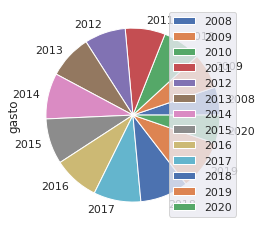

In [101]:
gastos_ano_sp.plot(kind='pie', y='gasto')

Não faz sentido usar este tipo de gráfico. Repare que as fatias parecem ter o mesmo tamanho.

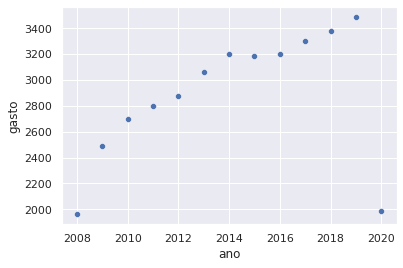

In [102]:
sns.scatterplot(data=gastos_ano_sp, x=gastos_ano_sp.index, y='gasto')

2020 não está com as informações completas, por isso entá tão abaixo dos demais resultados

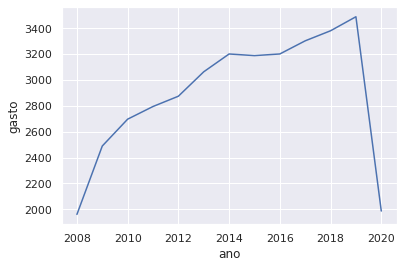

In [103]:
sns.lineplot(data=gastos_ano_sp, x=gastos_ano_sp.index, y='gasto')

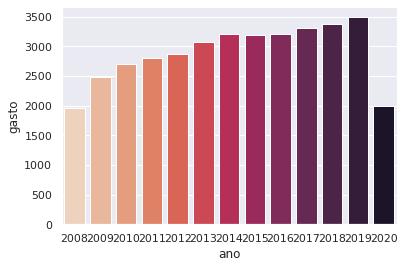

In [104]:
sns.barplot(data=gastos_ano_sp, x=gastos_ano_sp.index, y='gasto', palette = sns.color_palette('rocket_r', 13))

In [105]:
estados = ["São Paulo", "Minas Gerais", "Pernambuco"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(["uf","ano"]).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Minas Gerais,2008,894.35,77,29.44
1,Minas Gerais,2009,1149.14,78,37.77
2,Minas Gerais,2010,1217.49,78,40.03
3,Minas Gerais,2011,1315.02,78,43.24
4,Minas Gerais,2012,1408.35,78,46.29


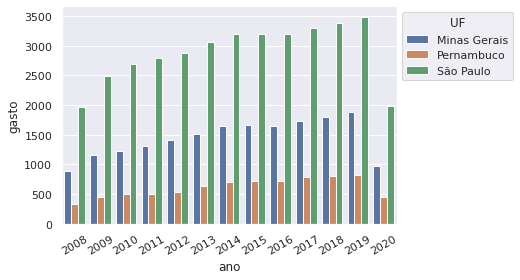

In [106]:
ax = sns.barplot(data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')
ax.legend(title='UF', bbox_to_anchor=(1, 1), loc=2) #legend box location
plt.xticks(rotation=30)
plt.show()

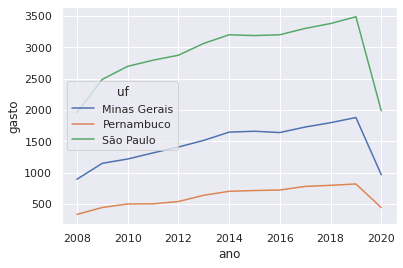

In [107]:
sns.lineplot(data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')

[CatPlot](https://seaborn.pydata.org/generated/seaborn.catplot.html) do seaborn

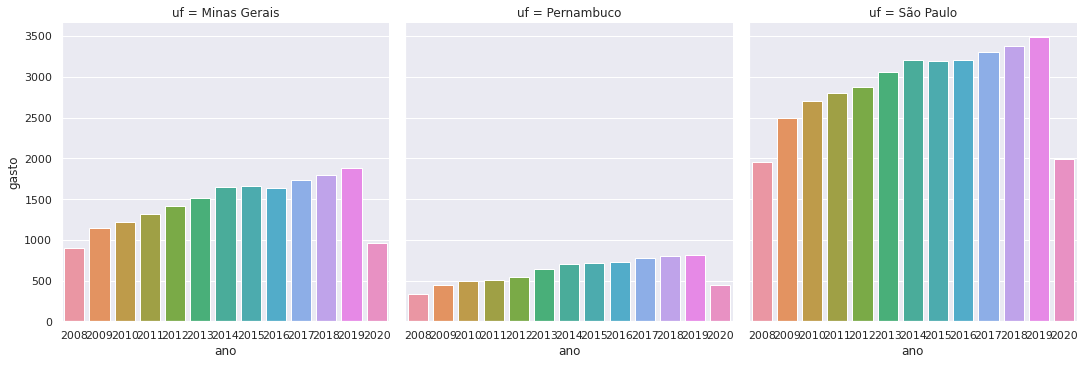

In [108]:
# Plot em categoria
# col == colunas == estados (uf)
sns.catplot(data=por_ano_dos_estados, y="gasto", x="ano", kind="bar", col="uf")

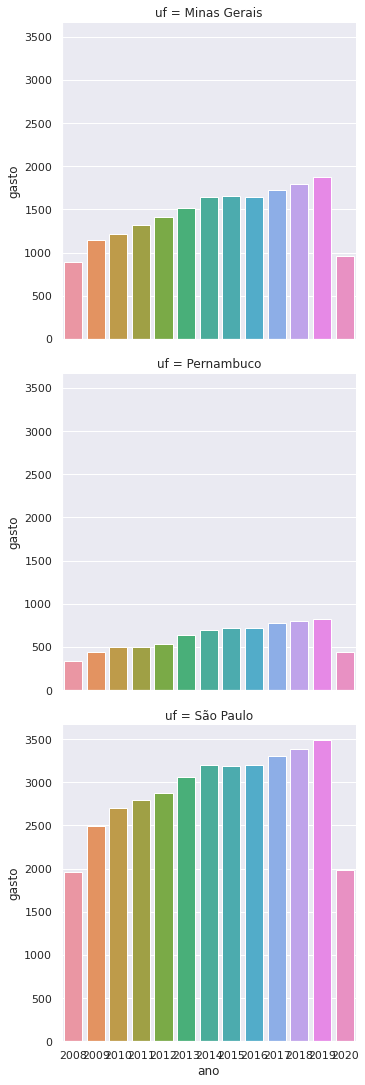

In [109]:
# Plot em categoria
# row == linhas == estados (uf)
sns.catplot(data=por_ano_dos_estados, y="gasto", x="ano", kind="bar", row="uf")

### **06. Desafios**

**Desafio 01: Reordenar as cores pelo valor do eixo y.**

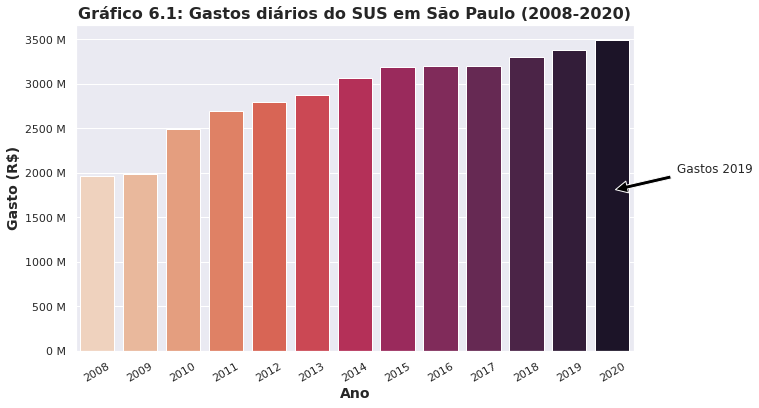

In [127]:
# Chart
plt.figure(figsize=(10,6))
ax = sns.barplot(data=gastos_ano_sp.sort_values(['gasto_diario'], ascending=True), 
            x=gastos_ano_sp.index, y='gasto', 
            palette = sns.color_palette('rocket_r', 13))

# Other formating
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f} M"))
plt.xticks(rotation=30)

# Title and labels
ax.set_xlabel('Ano', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Gasto (R$)', fontsize = 14, fontweight = 'bold')
ax.set_title('Gráfico 6.1: Gastos diários do SUS em São Paulo (2008-2020)', fontsize=16, fontweight='bold')

# Criando uma anotação no gráfico
ax.annotate('Gastos 2019', xy=(12, 1800), xytext=(13.5, 2000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

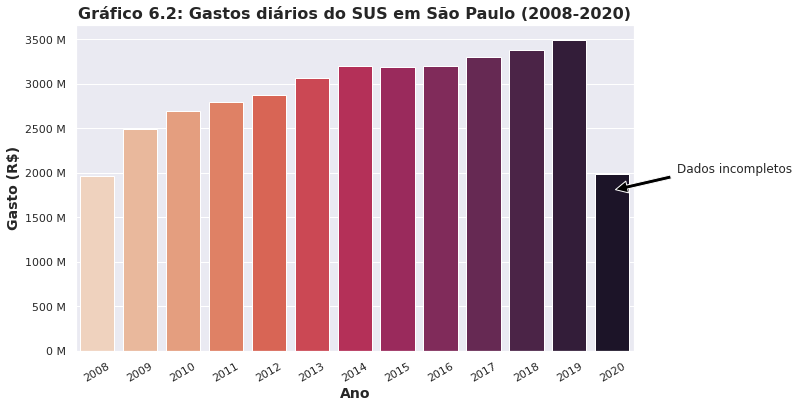

In [128]:
# Chart
plt.figure(figsize=(10,6))
ax = sns.barplot(data=gastos_ano_sp, 
            x=gastos_ano_sp.index, y='gasto', 
            palette = sns.color_palette('rocket_r', 13))

# Other formating
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f} M"))
plt.xticks(rotation=30)

# Title and labels
ax.set_xlabel('Ano', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Gasto (R$)', fontsize = 14, fontweight = 'bold')
ax.set_title('Gráfico 6.2: Gastos diários do SUS em São Paulo (2008-2020)', fontsize=16, fontweight='bold')

# Criando uma anotação no gráfico
ax.annotate('Dados incompletos', xy=(12, 1800), xytext=(13.5, 2000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

Ao ordenarmos os resultados, como no gráfico 6.1, a data é desassociada do gastos, isso nos da a impressão de que, a medida que os anos passam, o gasto está crescendo. Apesar de no gráfico 6.2 observarmos o mesmo, os gastos em relação ao ano não estão em ordem crescente perfeita. No gráfico 6.2 podemos ver que o ano de 2014 teve um gasto maior em relação ao ano anterior e ao ano antecessor. Ao mesmo tempo, 2020 possui os menores gastos. Possivelmente os dados de 2020 não então completos, por ser um ano muito recente, por isso os gastos são menores em relação aos demais. Para compreendermos o aumento nos gastos de 2014 podemos buscar compreender alguns pontos:
1. Se os gastos aumentaram em 2014 apenas em SP ou se o mesmo ocorreu em outros estados no Brasil;
2. Se essa grandeza persiste ao calcularmos o gasto percapta por pulação anual.

**Desafio 02: Explorar a documentação do Seaborn.**

https://seaborn.pydata.org/generated/seaborn.catplot.html

**Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.**

**Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.**

## **Referencias**

1. https://matplotlib.org/1.5.3/users/annotations_intro.html